## Importe de bibliotecas

In [1]:
import multiprocessing

from gensim.models import Word2Vec

import pandas as pd

## Carga de datos

In [2]:
resumenes_docentes = pd.read_csv("../ResumenesDocentes.csv")
resumenes_estudiantes = pd.read_csv("../ResumenesEstudiantes.csv")

## Verificacion datos

In [3]:
resumenes_docentes.shape

(308, 19)

In [4]:
resumenes_docentes.head(3)

,index,codigo,titulo,resumen,estado,id_autor,nombre_autor,programa,facultad,convocatoria,grupo_investigacion,linea_investigacion,palabras_clave,corpus,palabras,vocabulario,vocabulario_corpus,lemas_corpus,lemas
0,1,1464.0,"""Diagnóstico del impacto de las iniciativas em...",El emprendimiento es entre otras acepciones es...,Vencido,13515.0,Francisco Rafael Ayala,Diseño,Artes,Docente 2017,Currículo y Universidad,Curriculos pertinentes,Diagnóstico,"""Diagnóstico del impacto de las iniciativas em...","['diagnóstico', 'impacto', 'iniciativas', 'emp...","{'dispuesto', 'profesionales', 'identificar', ...",dispuesto profesionales identificar papel bene...,disponer profesional identificar papel benefic...,"['disponer', 'profesional', 'identificar', 'pa..."
1,2,1367.0,Acoso Escolar (Bullying) en San Juan de Pasto....,"A nivel mundial, uno de cada tres escolares ha...",Prorroga,11902.0,Harvey Mauricio Herrera Lopez,Psicología,Ciencias Humanas,Docente 2017,Psicología y Salud,Aspectos Psicosociales en Procesos de Salud,Acoso Escolar,Acoso Escolar (Bullying) en San Juan de Pasto....,"['acoso', 'escolar', 'bullying', 'juan', 'past...","{'ítem', 'mental', 'representa', 'bullying', '...",ítem mental representa bullying modelos empíri...,item mental representar bullying modelo empiri...,"['item', 'mental', 'representar', 'bullying', ..."
2,3,1343.0,ACTIVIDAD ANTIBACTERIAL DE POLIFENOLES DEL AGU...,El cáncer gástrico (CG) es la principal causa ...,Vencido,10081.0,Nelson Humberto Hurtado Gutierrez,Química,Ciencias Exactas y Naturales,Docente 2016,GRUPO DE INVESTIGACIÓN EN PRODUCTOS DE IMPORTA...,Modelado molecular,cancer gastrico,ACTIVIDAD ANTIBACTERIAL DE POLIFENOLES DEL AGU...,"['actividad', 'antibacterial', 'polifenoles', ...","{'altas', 'frente', 'papel', 'dieta', 'prepond...",altas frente papel dieta preponderante natural...,alto frente papel dieta preponderante natural ...,"['alto', 'frente', 'papel', 'dieta', 'preponde..."


In [5]:
resumenes_estudiantes.shape

(143, 21)

In [6]:
resumenes_estudiantes.head(3)

,index,codigo,titulo,resumen,estado,id_autor,nombre_autor,programa,departamento,facultad,...,convocatoria,grupo_investigacion,linea_investigacion,palabras_clave,corpus,palabras,vocabulario,vocabulario_corpus,lemas_corpus,lemas
0,1,741.0,"AISLAMIENTO, CARACTERIZACION, ESTABILIDAD Y AC...",El color es una de las cualidades sensoriales ...,Terminado,12324.0,Omaira Carolina Betancourt Ramos,Química,Química,Ciencias Exactas y Naturales,...,Adicional de Trabajos de Grado 2013,GRUPO DE INVESTIGACIÓN EN PRODUCTOS DE IMPORTA...,Productos naturales,,"AISLAMIENTO, CARACTERIZACION, ESTABILIDAD Y AC...","['aislamiento', 'caracterizacion', 'estabilida...","{'asocia', 'identificar', 'frente', 'picrylhyd...",asocia identificar frente picrylhydrazil añadi...,asociar identificar frente picrylhydrazil añad...,"['asociar', 'identificar', 'frente', 'picrylhy..."
1,2,760.0,ANÁLISIS DE ALGORITMOS PARALELOS PARA LA TAREA...,La propuesta de la investigación se centra en ...,Cancelado,12479.0,Rosa Maria Zambrano Burbano,Ingeniería de Sistemas,Sistemas,Ingeniería,...,Adicional de Trabajos de Grado 2013,GRIAS,Deteccione de patrones con tecnicas de mineria...,,ANÁLISIS DE ALGORITMOS PARALELOS PARA LA TAREA...,"['análisis', 'algoritmos', 'paralelos', 'tarea...","{'identificar', 'sustraer', 'conoce', 'costos'...",identificar sustraer conoce costos razón toma ...,identificar sustraer conocer costo razon tomar...,"['identificar', 'sustraer', 'conocer', 'costo'..."
2,3,1412.0,ANÁLISIS DE FUNCIONALIDAD DE LA HERRAMIENTA DE...,Hoy en día se puede encontrar muchas opciones ...,Vencido,13872.0,Carlos Mario Coral Cabrera,Ingeniería de Sistemas,Sistemas,Ingeniería,...,Estudiantil 2017,GRIAS,Descubrimiento de conocimiento en bases de datos,Análisis de funcionalidad,ANÁLISIS DE FUNCIONALIDAD DE LA HERRAMIENTA DE...,"['análisis', 'funcionalidad', 'herramienta', '...","{'profesionales', 'libre', 'toma', 'presente',...",profesionales libre toma presente permite ayud...,profesional librar tomar presentar permitir ay...,"['profesional', 'librar', 'tomar', 'presentar'..."


## Bigramas

In [13]:
from gensim.models.phrases import Phrases, Phraser

In [15]:
phrases = Phrases(lemas_corpus_docentes_spliteados, min_count=30, progress_per=10000)

In [16]:
bigram = Phraser(phrases)

In [18]:
sentences = bigram[lemas_corpus_docentes_spliteados]

## Preparación de datos

### Docentes

In [9]:
lemas_corpus_docentes=resumenes_docentes['lemas_corpus']

In [10]:
lemas_corpus_docentes_agrupados = ""
for row in lemas_corpus_docentes:
    lemas_corpus_docentes_agrupados  = lemas_corpus_docentes_agrupados  + row

In [11]:
lemas_corpus_docentes_spliteados = lemas_corpus_docentes_agrupados .split()

In [12]:
lemas_corpus_docentes_spliteados

['disponer',
 'profesional',
 'identificar',
 'papel',
 'beneficio',
 'flexible',
 'pretender',
 'conveniente',
 'permitir',
 'aporte',
 'basico',
 'relacionar',
 'formador',
 'estudio',
 'gradar',
 'nivel',
 'complejidad',
 'grupo',
 'continuo',
 'fomentar',
 'tecnologico',
 'publico',
 'beneficiar',
 'colectivo',
 'creativo',
 'afrontar',
 'emprendedor',
 'promover',
 'experiencia',
 'academico',
 'proponer',
 'cambiar',
 'universidad',
 'individual',
 'academico',
 'evolucionar',
 'procesar',
 'ayala',
 'complejo',
 'interesar',
 'tipificar',
 'expectativa',
 'escuchar',
 'importancia',
 'modalidad',
 'participar',
 'asociar',
 'dinamico',
 'egresar',
 'sostenible',
 'vital',
 'plantear',
 'particular',
 'catalogar',
 'individuo',
 'aportar',
 'estimulante',
 'concienciar',
 'principio',
 'desarrollo',
 'humano',
 'conjuntar',
 'capaz',
 'capacidad',
 'social',
 'industriar',
 'extremar',
 'individuo',
 'crecimiento',
 'innovador',
 'asumir',
 'diseñar',
 'estrategico',
 'creacion',

### Estudiantes

In [38]:
lemas_corpus_estudiantes=resumenes_estudiantes['lemas_corpus']

In [39]:
lemas_corpus_estudiantes_agrupados = ""
for row in lemas_corpus_estudiantes:
    lemas_corpus_estudiantes_agrupados  = lemas_corpus_estudiantes_agrupados  + row

In [40]:
lemas_corpus_estudiantes_spliteados = lemas_corpus_estudiantes_agrupados .split()

In [41]:
lemas_corpus_estudiantes_spliteados

['asociar',
 'identificar',
 'frente',
 'picrylhydrazil',
 'añadir',
 'cientifico',
 'cactus',
 'ramo',
 'adicional',
 'implementar',
 'potencial',
 'colesterol',
 'interes',
 'esencial',
 'frecuentemente',
 'aislar',
 'biologico',
 'dpph',
 'nelson',
 'hplc-ms',
 'desconocer',
 'salud',
 'tecnico',
 'medicinal',
 'preventivo',
 'libre',
 'grupo',
 'buscar',
 'estudiar',
 'fase',
 'triglicerido',
 'oxidacion',
 'alimento',
 'tintorial',
 'dicha',
 'importante',
 'caracteristico',
 'intervalo',
 'dillenni',
 'relevancia',
 'cambiar',
 'antioxidante',
 'fuente',
 'sintetico',
 'amberlita',
 'natural',
 'propiedad',
 'experimental',
 'parecer',
 'clavar',
 'dudar',
 'colorante',
 'betancourt',
 'plantear',
 'importancia',
 'teac',
 'utilizar',
 'efecto',
 'pigmento',
 'anticancerigena',
 'rojo-violeta',
 'presentar',
 'plantear',
 'poseer',
 'percepcion',
 'usar',
 'especifico',
 'claro',
 'columna',
 'quimico',
 'humano',
 'caracterizacion',
 'tipo',
 'aceptar',
 'consumidor',
 'alto',
 

In [43]:
len(lemas_corpus_docentes_spliteados)

42487

In [42]:
len(lemas_corpus_estudiantes_spliteados)

17736

## Word2vec con docentes

In [19]:
# Fase de creación de modelo


modelo = Word2Vec(min_count=2,
                     window=2,
                     size=10,
                     sample=0, 
                     alpha=0.01, 
                     min_alpha=0.0, 
                     negative=100,
                     workers=8)


modelo

In [20]:
# Fase de construcción de vocabulario

vocabulario = modelo.build_vocab([lemas_corpus_docentes_spliteados], progress_per=10000)
vocabulario

In [21]:
# Fase de entrenamiento

entrenamiento = modelo.train([lemas_corpus_docentes_spliteados], total_examples=modelo.corpus_count, epochs=10, report_delay=1)
entrenamiento

(100000, 424870)

In [44]:
# para no volver a entrenar
# w2v_model.init_sims(replace=True)

## Word2vec con estudiantes

In [45]:
# Fase de creación de modelo


modelo2 = Word2Vec(min_count=2,
                     window=2,
                     size=10,
                     sample=0, 
                     alpha=0.01, 
                     min_alpha=0.0, 
                     negative=100,
                     workers=8)


modelo2

In [46]:
# Fase de construcción de vocabulario

vocabulario2 = modelo2.build_vocab([lemas_corpus_estudiantes_spliteados], progress_per=10000)
vocabulario2

In [47]:
# Fase de entrenamiento

entrenamiento2 = modelo2.train([lemas_corpus_estudiantes_spliteados], total_examples=modelo2.corpus_count, epochs=10, report_delay=1)
entrenamiento2

(100000, 177360)

In [144]:
# para no volver a entrenar
# w2v_model.init_sims(replace=True)

## Word2vec completo

In [53]:
lemas_corpus_spliteados_completo = lemas_corpus_docentes_spliteados+lemas_corpus_estudiantes_spliteados

In [55]:
len(lemas_corpus_spliteados_completo)

60223

In [57]:
type(lemas_corpus_spliteados_completo)

list

In [58]:
modelo3 = Word2Vec(min_count=2,
                     window=2,
                     size=10,
                     sample=0, 
                     alpha=0.01, 
                     min_alpha=0.0, 
                     negative=100,
                     workers=8)


modelo3

In [59]:
# Fase de construcción de vocabulario

vocabulario3 = modelo3.build_vocab([lemas_corpus_spliteados_completo], progress_per=10000)
vocabulario3

In [60]:
# Fase de entrenamiento

entrenamiento3 = modelo3.train([lemas_corpus_spliteados_completo], total_examples=modelo3.corpus_count, epochs=10, report_delay=1)
entrenamiento3

(100000, 602230)

## Exploración de modelo

In [61]:
modelo3.wv.most_similar(positive=['analizar'])

[('contener', 0.9999573230743408),
 ('humanar', 0.9999560117721558),
 ('cultivar', 0.9999541640281677),
 ('buscar', 0.9999474287033081),
 ('regional', 0.9999456405639648),
 ('permitir', 0.9999440908432007),
 ('ciencia', 0.9999432563781738),
 ('utilizar', 0.9999420642852783),
 ('desarrollar', 0.9999397397041321),
 ('departamento', 0.999934732913971)]

In [62]:
modelo3.wv.similarity('social', "sociedad")

0.9996509

In [63]:
modelo3.wv.similarity('conocimiento', "conocer")

0.9999159

In [84]:
modelo3.wv.similarity('agricultura', "motor")

0.35928416

In [66]:
modelo3.wv.doesnt_match(["conocimiento","conocer","social"])

'social'

In [65]:
modelo3.wv.doesnt_match(["motor","sociedad","social"])

'motor'

## Visualizacion

In [89]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [90]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    counter=0
    for word in model.wv.vocab:
        if counter == 100:
            break
        tokens.append(model[word])
        labels.append(word)
        counter= counter+1
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

<ipython-input-90-c04bc18e4ee9>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


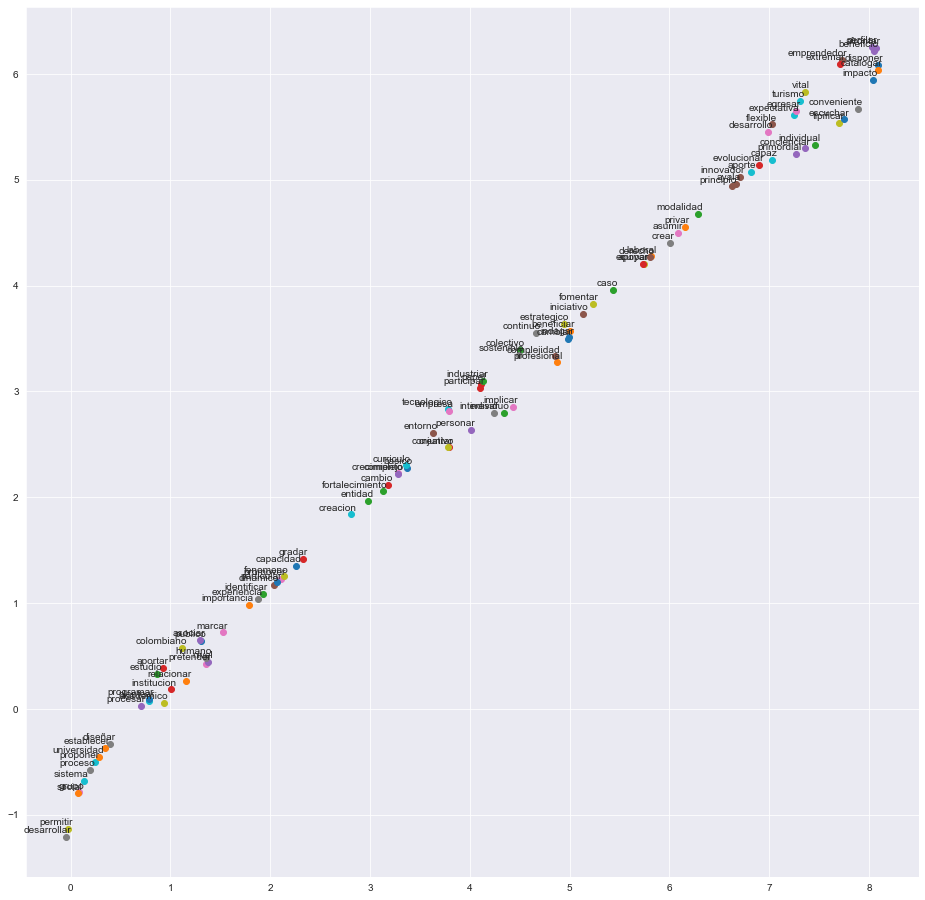

In [91]:
tsne_plot(modelo3)